In [1]:
import numpy as np
import pandas as pd
import pickle as pkl

import ModelManager as mm_mod
import config_defaults as cd
from importlib import reload
import logging

import matplotlib.pyplot as plt
%matplotlib inline

### Baseline Training History

In [17]:
reload(mm_mod)
logger = logging.getLogger('__main__')
logger.setLevel(logging.INFO)

mm = mm_mod.ModelManager()
mm.train()

INFO     initialized model with hyperparametrs:
INFO     LR: 0.01
INFO     LR_DECAY_RATE: 0.95
INFO     NEPOCH: 10
INFO     BATCH_SIZE: 32
INFO     NGRAM_SIZE: 2
INFO     VOC_SIZE: 100000
INFO     EMBEDDING_DIM: 50
INFO     NGRAM_MODE: spacy
INFO     VAL_SIZE: 5000
INFO     OPTIMIZER: <class 'torch.optim.adam.Adam'>
INFO     VAL_FREQ: 4
INFO     REMOVE_STOP_WORDS: True
INFO     REMOVE_PUNC: True
INFO     EARLY_STOP: True
INFO     EARLY_STOP_LOOKBACK: 8
INFO     EARLY_STOP_MIN_IMPROVE: 0.01
INFO     allow pickle loads: True, allow pickle saves: True
INFO     looking for the following file paths: ./data/pickles/trainval_spacy_2_True_True.p
./data/pickles/test_spacy_2_True_True.p
./data/pickles/idx_spacy_2_True_True_5000_100000.p
INFO     found pickle files in ./data/pickles/, loading them instead of rebuilding ... 
INFO     found pickle files for indexer in ./data/pickles/, loading them ... 
INFO     setting each dataset's token indexes
INFO     setting each dataset's token indexes
INFO 

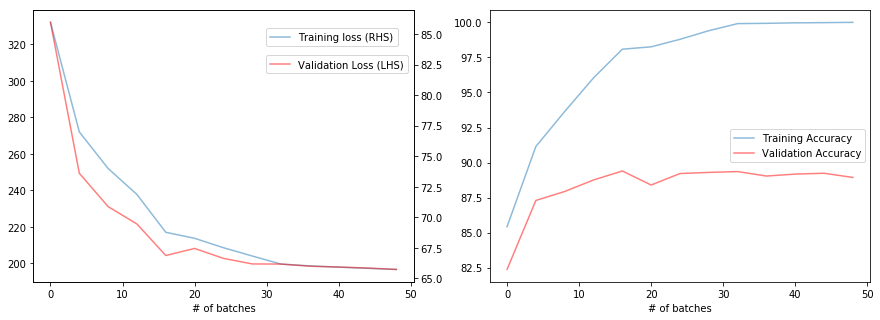

In [74]:
batch_counter = np.arange(0,len(mm.train_loss_hist))*4


f, axs = plt.subplots(1, 2, figsize=(15,5))
ax1 = axs[0]
ax1.plot(batch_counter, mm.train_loss_hist, alpha = 0.5, label='Training loss (RHS)')
ax1.set_xlabel("# of batches")
ax1.legend(loc='center left', bbox_to_anchor=(0.6, 0.9))
ax2 = ax1.twinx()
ax2.plot(batch_counter, mm.val_loss_hist, color='r', alpha=0.5, label='Validation Loss (LHS)')
ax2.legend(loc='center left', bbox_to_anchor=(0.6, 0.8))

ax3 = axs[1]
ax3.plot(batch_counter, mm.train_acc_hist, alpha = 0.5, label='Training Accuracy')
ax3.set_xlabel("# of batches")
ax3.plot(batch_counter, mm.val_acc_hist, color='r', alpha=0.5, label='Validation Accuracy')
ax3.legend(loc='center right')
plt.show()

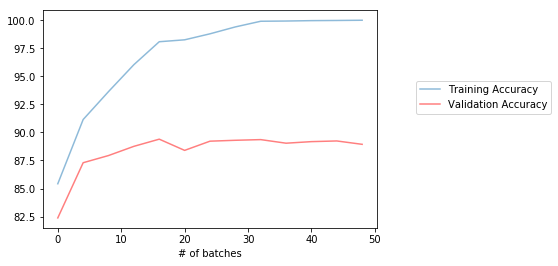

In [50]:
batch_counter = np.arange(0,len(mm.train_loss_hist))*4
fig1, ax1 = plt.subplots()
ax1.plot(batch_counter, mm.train_acc_hist, alpha = 0.5, label='Training Accuracy')
ax1.set_xlabel("# of batches")
ax1.plot(batch_counter, mm.val_acc_hist, color='r', alpha=0.5, label='Validation Accuracy')
ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.6))
# plt.title("Baseline model Training loss and Validation Loss by Batch (every 4 batchs)")
# plt.savefig('writeup/img/trainvallossbase.png')
plt.show()

### Learning Rate Exploration

In [75]:
fp = r'./results/lr_explore.p'
df = pkl.load(open(fp, 'rb'))
df.head()

,initial_val_acc,epoch1_val_acc,epoch2_val_acc,epoch3_val_acc,final_val_acc,training_time,total_data_iterated,early_stopped,pct_unk_train,pct_unk_val,...,EMBEDDING_DIM,NGRAM_MODE,VAL_SIZE,OPTIMIZER,VAL_FREQ,REMOVE_STOP_WORDS,REMOVE_PUNC,EARLY_STOP,EARLY_STOP_LOOKBACK,EARLY_STOP_MIN_IMPROVE
1,,,,,50.90,4.44,20000,False,0.530094,0.534054,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,False,2,0.01
2,,,,,60.46,4.4,20000,False,0.530094,0.534054,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,False,2,0.01
3,,,,,74.80,4.38,20000,False,0.530094,0.534054,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,False,2,0.01
4,,,,,87.40,4.58,20000,False,0.530094,0.534054,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,False,2,0.01
5,,,,,84.18,4.39,20000,False,0.530094,0.534054,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,False,2,0.01


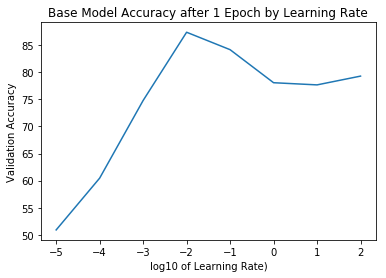

In [76]:
plt.plot(np.log10(df['LR']), df['final_val_acc'])
plt.title("Base Model Accuracy after 1 Epoch by Learning Rate")
plt.xlabel("log10 of Learning Rate)")
plt.ylabel("Validation Accuracy")
plt.savefig(r'writeup/img/lr_explore.png')
plt.show()

### Tokenization Explore

In [97]:
fp = r'./results/vocab_explore.p'
df = pkl.load(open(fp, 'rb'))
df.head()

,initial_val_acc,epoch1_val_acc,epoch2_val_acc,epoch3_val_acc,final_val_acc,training_time,total_data_iterated,early_stopped,pct_unk_train,pct_unk_val,...,EMBEDDING_DIM,NGRAM_MODE,VAL_SIZE,OPTIMIZER,VAL_FREQ,REMOVE_STOP_WORDS,REMOVE_PUNC,EARLY_STOP,EARLY_STOP_LOOKBACK,EARLY_STOP_MIN_IMPROVE
1,,,,,86.72,14.92,36384,True,0.244464,0.249718,...,100,naive,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
2,,87.4,,,87.54,22.32,44096,True,0.170917,0.180050,...,100,naive,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
3,,87.58,,,87.54,27.01,44096,True,0.134779,0.146825,...,100,naive,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
4,,86.74,,,86.94,36.56,44096,True,0.112453,0.127482,...,100,naive,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
5,,87.04,,,87.78,42.76,44096,True,0.096929,0.114567,...,100,naive,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01


In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
final_val_acc,64.0,88.352500,0.885384,85.960000,87.715000,88.460000,89.020000,89.740000
total_data_iterated,64.0,50436.000000,9357.960434,36384.000000,44096.000000,48192.000000,53312.000000,88192.000000
pct_unk_train,64.0,0.484272,0.257272,0.010923,0.345287,0.583013,0.689611,0.801887
pct_unk_val,64.0,0.494599,0.253548,0.033413,0.361999,0.596571,0.698909,0.803563
LR,64.0,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000
NEPOCH,64.0,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000
BATCH_SIZE,64.0,32.000000,0.000000,32.000000,32.000000,32.000000,32.000000,32.000000
NGRAM_SIZE,64.0,2.500000,1.126872,1.000000,1.750000,2.500000,3.250000,4.000000
VOC_SIZE,64.0,45000.000000,23094.010768,10000.000000,27500.000000,45000.000000,62500.000000,80000.000000
EMBEDDING_DIM,64.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000


max acc = 89.74


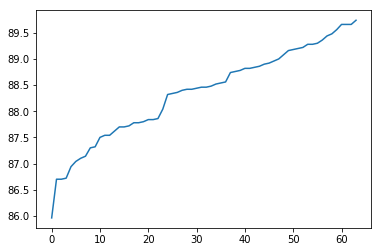

In [99]:
plt.plot(df['final_val_acc'].sort_values().values)
print("max acc = %s" % df['final_val_acc'].max())
plt.show()

### for each tokenization scheme, how does vocabulary size affect performance

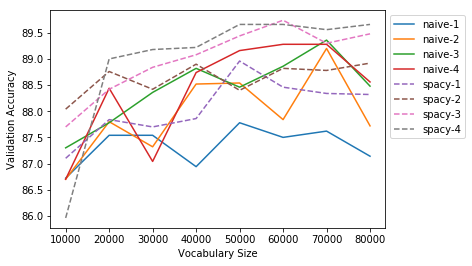

In [105]:
ng_sizes = np.sort(df['NGRAM_SIZE'].unique())
ng_modes = ('naive', 'spacy')

for ng_mode in ng_modes:
    for ng_size in ng_sizes:
        sub_df = df[(df['NGRAM_SIZE'] == ng_size) & (df['NGRAM_MODE'] == ng_mode)]
        if ng_mode=='spacy':
            plt.plot(sub_df['VOC_SIZE'], sub_df['final_val_acc'], label=ng_mode + "-" + str(ng_size), 
                     linestyle='--')
        else:
            plt.plot(sub_df['VOC_SIZE'], sub_df['final_val_acc'], label=ng_mode + "-" + str(ng_size))
plt.ylabel("Validation Accuracy")
plt.xlabel("Vocabulary Size")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### extra investigation for ngram size 4 and spacy

In [106]:
fp = r'./results/voc_additional.p'
df = pkl.load(open(fp, 'rb'))
df.head()

,initial_val_acc,epoch1_val_acc,epoch2_val_acc,epoch3_val_acc,final_val_acc,training_time,total_data_iterated,early_stopped,pct_unk_train,pct_unk_val,...,EMBEDDING_DIM,NGRAM_MODE,VAL_SIZE,OPTIMIZER,VAL_FREQ,REMOVE_STOP_WORDS,REMOVE_PUNC,EARLY_STOP,EARLY_STOP_LOOKBACK,EARLY_STOP_MIN_IMPROVE
1,,90.32,89.96,,89.72,147.78,68192,True,0.678686,0.690848,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
2,,89.36,89.54,,89.40,146.82,64096,True,0.674262,0.687713,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
3,,89.26,,,89.40,122.35,52288,True,0.670891,0.685635,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
4,,89.62,89.64,,89.56,155.49,64096,True,0.667521,0.683472,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
5,,89.70,,,89.86,130.85,48192,True,0.664150,0.681276,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01


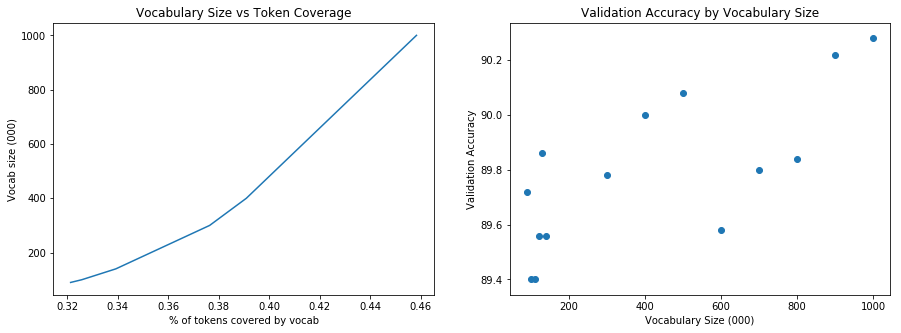

In [114]:

f, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(1-df['pct_unk_train'], df['VOC_SIZE'] / 1000)
axs[0].set_title("Vocabulary Size vs Token Coverage")
axs[0].set_xlabel("% of tokens covered by vocab")
axs[0].set_ylabel("Vocab size (000)")

axs[1].scatter(df['VOC_SIZE']/1000, df['final_val_acc'])
plt.title("Validation Accuracy by Vocabulary Size")
axs[1].set_xlabel("Vocabulary Size (000)")
axs[1].set_ylabel("Validation Accuracy")

plt.show()

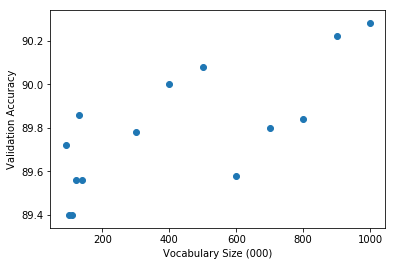

In [109]:
plt.scatter(df['VOC_SIZE']/1000, df['final_val_acc'])
#plt.title("Vocabulary Size vs Token Coverage")
plt.xlabel("Vocabulary Size (000)")
plt.ylabel("Validation Accuracy")
plt.show()

In [ ]:
df_res = df.set_index(['NGRAM_SIZE', 'NGRAM_MODE']).sort_index()

In [ ]:
def graph_fn(df):
    print(df.index.values[0])
    plt.scatter(df['VOC_SIZE'],df['final_val_acc'])
    plt.show()
df_res.groupby(df_res.index).apply(graph_fn)

### Embedding size optimization

In [77]:
fp = r'./results/embdim.p'
df = pkl.load(open(fp, 'rb')).reset_index(drop=True)
display(df.head())
print(df.shape)

,initial_val_acc,epoch1_val_acc,epoch2_val_acc,epoch3_val_acc,final_val_acc,training_time,total_data_iterated,early_stopped,pct_unk_train,pct_unk_val,...,EMBEDDING_DIM,NGRAM_MODE,VAL_SIZE,OPTIMIZER,VAL_FREQ,REMOVE_STOP_WORDS,REMOVE_PUNC,EARLY_STOP,EARLY_STOP_LOOKBACK,EARLY_STOP_MIN_IMPROVE
0,,88.18,,,88.60,20.51,44096,True,0.476073,0.482561,...,50,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
1,,89.02,,,88.98,24.38,48192,True,0.447026,0.455849,...,50,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
2,,89.08,,,89.24,30.41,48192,True,0.426857,0.438027,...,50,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
3,,89.14,89,,89.00,42.43,64096,True,0.411370,0.424864,...,50,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
4,,86.82,,,89.30,42.68,48192,True,0.398803,0.414668,...,50,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01


(154, 25)


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
final_val_acc,154.0,88.570000,0.457308,86.940000,88.320000,88.600000,88.820000,89.680000
total_data_iterated,154.0,45676.051948,5192.138955,32288.000000,44096.000000,44096.000000,48192.000000,68192.000000
pct_unk_train,154.0,0.396923,0.038289,0.349763,0.363126,0.387804,0.426857,0.476073
pct_unk_val,154.0,0.415096,0.031162,0.379440,0.388387,0.406038,0.438027,0.482561
LR,154.0,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000
NEPOCH,154.0,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000
BATCH_SIZE,154.0,32.000000,0.000000,32.000000,32.000000,32.000000,32.000000,32.000000
NGRAM_SIZE,154.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
VOC_SIZE,154.0,70000.000000,31725.950698,20000.000000,40000.000000,70000.000000,100000.000000,120000.000000
EMBEDDING_DIM,154.0,375.000000,202.214052,50.000000,200.000000,375.000000,550.000000,700.000000


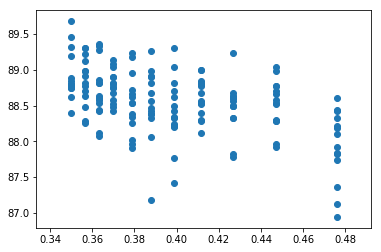

In [79]:
# do pct unk tokens affect the final accuracy?
plt.scatter(df['pct_unk_train'], df['final_val_acc'])
plt.show()

In [80]:
df['VOC_SIZE'].unique()

array([ 20000,  30000,  40000,  50000,  60000,  70000,  80000,  90000,
       100000, 110000, 120000])

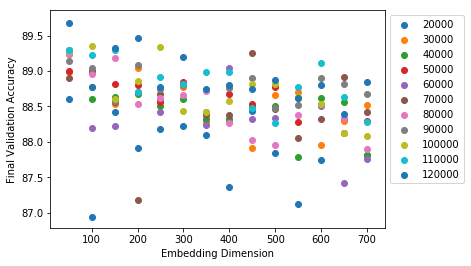

In [92]:
for voc_size in df['VOC_SIZE'].unique():
    sub_df = df[df['VOC_SIZE'] == voc_size]
    plt.scatter(sub_df['EMBEDDING_DIM'], sub_df['final_val_acc'], label=voc_size)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Embedding Dimension")
plt.ylabel("Final Validation Accuracy")
plt.show()

### LR Decay

In [ ]:
fp = r'./results/lr_decay_small_lr.p'
df = pkl.load(open(fp, 'rb')).reset_index(drop=True)
display(df.head())
print(df.shape)

In [ ]:
plt.scatter(df['LR_DECAY_RATE'], df['final_val_acc'])
plt.show()

In [ ]:
import ModelManager as mm_mod

In [ ]:
mm = mm_mod.ModelManager()

In [ ]:
mm.load_data()
mm.data_to_pipe()
mm.model_init()

In [ ]:
mm.model.state_dict()